In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df=pd.read_csv('/content/Unemployment in India.csv')
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
df.shape

(768, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [6]:
df.columns=['State','Date','Frequency','Unemployment_Rate','Estimated_Employed','Labour_Participation_Rate','Area']

In [7]:
df.isnull().sum()

State                        28
Date                         28
Frequency                    28
Unemployment_Rate            28
Estimated_Employed           28
Labour_Participation_Rate    28
Area                         28
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

State                        0
Date                         0
Frequency                    0
Unemployment_Rate            0
Estimated_Employed           0
Labour_Participation_Rate    0
Area                         0
dtype: int64

In [10]:
df.shape

(740, 7)

In [11]:
df['Date']=pd.to_datetime(df['Date'],dayfirst='True')

In [12]:
df['Month'] = df['Date'].dt.month
df['Month']

0      5
1      6
2      7
3      8
4      9
      ..
749    2
750    3
751    4
752    5
753    6
Name: Month, Length: 740, dtype: int32

In [13]:
df['Month_name'] = pd.to_datetime(df['Month'], format='%m').dt.strftime('%B')

In [14]:
df.head()

,State,Date,Frequency,Unemployment_Rate,Estimated_Employed,Labour_Participation_Rate,Area,Month,Month_name
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,June
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,July
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,August
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,September


In [15]:
df['State'].unique()
df['State'].value_counts()

State
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

In [17]:
south=['Andhra Pradesh','Goa','Karnataka', 'Kerala','Tamil Nadu', 'Puducherry','Telangana']
north=['Haryana', 'Himachal Pradesh', 'Jammu & Kashmir','Punjab','Delhi','Uttar Pradesh', 'Uttarakhand',  'Chandigarh','Rajasthan']
east=['West Bengal','Assam', 'Bihar', 'Chhattisgarh','Jharkhand','Odisha','Sikkim','Tripura','Meghalaya']
west=['Gujarat','Maharashtra','Madhya Pradesh']
df['Region'] = ' '  # Initialize the 'Region' column

for index, row in df.iterrows():
    state = row['State']
    if state in south:
        df.at[index, 'Region'] = 'South'
    elif state in north:
        df.at[index, 'Region'] = 'North'
    elif state in east:
        df.at[index, 'Region'] = 'East'
    else:
        df.at[index, 'Region'] = 'West'

In [18]:
df.head()

,State,Date,Frequency,Unemployment_Rate,Estimated_Employed,Labour_Participation_Rate,Area,Month,Month_name,Region
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May,South
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,June,South
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,July,South
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,August,South
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,September,South


In [19]:
data_df = df[['Unemployment_Rate','Estimated_Employed','Labour_Participation_Rate','Month']]

In [21]:
corr = data_df.corr()
corr

,Unemployment_Rate,Estimated_Employed,Labour_Participation_Rate,Month
Unemployment_Rate,1.000000,-0.222876,0.002558,-0.122938
Estimated_Employed,-0.222876,1.000000,0.011300,0.011285
Labour_Participation_Rate,0.002558,0.011300,1.000000,0.087257
Month,-0.122938,0.011285,0.087257,1.000000


<Axes: >

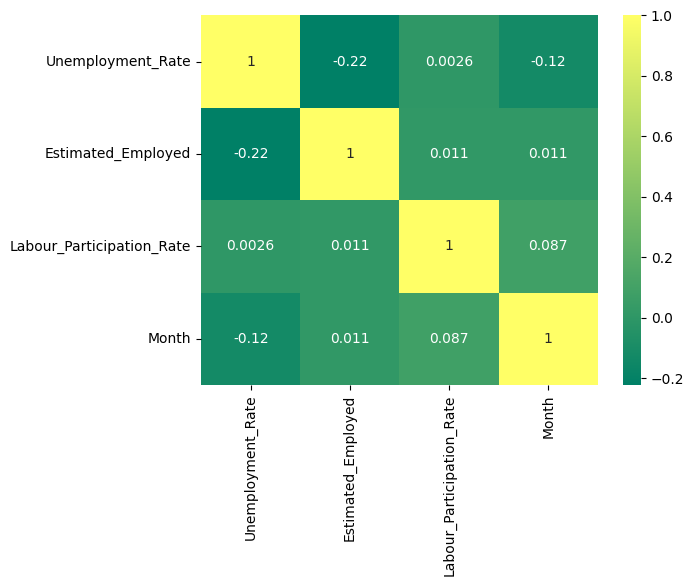

In [22]:
sns.heatmap(corr, annot=True, cmap='summer')

# **Creating Animated Box Plots**

In [23]:
fig = px.box(df, x='State', y='Unemployment_Rate', color='State', animation_frame='Month_name', title='Unemployment Rate by State and Month', template='seaborn')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

# **Creating Animated Scatter Matrix for Employment Rates, Unemployment Rate and Labour Participation Rate**

In [24]:
fig=px.scatter_matrix(df,template='seaborn',dimensions=['Estimated_Employed','Unemployment_Rate','Labour_Participation_Rate'],color='Region')
fig.show()

In [25]:
unemp_df=df[['Unemployment_Rate','State']]
unemp_df

,Unemployment_Rate,State
0,3.65,Andhra Pradesh
1,3.05,Andhra Pradesh
2,3.75,Andhra Pradesh
3,3.32,Andhra Pradesh
4,5.17,Andhra Pradesh
...,...,...
749,7.55,West Bengal
750,6.67,West Bengal
751,15.63,West Bengal
752,15.22,West Bengal


In [26]:
unemp_states_df=df.groupby('State')['Unemployment_Rate'].mean().reset_index()
unemp_states_df=unemp_states_df.sort_values('Unemployment_Rate')

# **Plotting Animated Bar chart- Average Unemployment Rate in Each State**

In [27]:
fig = px.bar(unemp_states_df, x='State', y='Unemployment_Rate', color='State', title='Average Unemployment Rate in Each State', template='seaborn')
fig.show()

In [28]:
unemp_reg=df[['Region','Unemployment_Rate']]
unemp_reg=df.groupby('Region')['Unemployment_Rate'].mean().reset_index()
unemp_reg=unemp_reg.sort_values('Unemployment_Rate')
fig=px.bar(unemp_reg,x='Region',y='Unemployment_Rate',color='Region',title='Average Unemployment Rate in Each Region',template='seaborn')
fig.show()

In [29]:
fig=px.bar(df,x='Region',y='Unemployment_Rate',animation_frame='Month_name',color='State',title='Unemployment Rate in across regions from Jan 2020 to Dec 2020', height=700, template='seaborn')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration']=1000
fig.show()

In [30]:
emp_df=df[['State','Region','Unemployment_Rate','Estimated_Employed','Labour_Participation_Rate']]
emp_df=df.groupby(['Region','State'])['Unemployment_Rate'].mean().reset_index()

In [31]:
fig=px.sunburst(emp_df,path=['Region','State'],values='Unemployment_Rate', color_continuous_scale='rdylbu', title='Unemployment Rate in Each Region and State', height=650, template='ggplot2')
fig.show()

# **Before Lockdown**

In [32]:
bf_lockdown_df=df[(df['Month']>=1) & (df['Month']<4)]
bf_lockdown_df

,State,Date,Frequency,Unemployment_Rate,Estimated_Employed,Labour_Participation_Rate,Area,Month,Month_name,Region
8,Andhra Pradesh,2020-01-31,Monthly,4.84,12016676.0,43.46,Rural,1,January,South
9,Andhra Pradesh,2020-02-29,Monthly,5.91,11723617.0,42.83,Rural,2,February,South
10,Andhra Pradesh,2020-03-31,Monthly,4.06,11359660.0,40.66,Rural,3,March,South
21,Assam,2020-01-31,Monthly,4.29,11420996.0,54.90,Rural,1,January,East
22,Assam,2020-02-29,Monthly,3.26,8462814.0,40.17,Rural,2,February,East
...,...,...,...,...,...,...,...,...,...,...
735,Uttarakhand,2020-02-29,Monthly,5.28,963408.0,35.11,Urban,2,February,North
736,Uttarakhand,2020-03-31,Monthly,8.15,889245.0,33.33,Urban,3,March,North
748,West Bengal,2020-01-31,Monthly,7.27,11208617.0,45.39,Urban,1,January,East
749,West Bengal,2020-02-29,Monthly,7.55,10871168.0,44.09,Urban,2,February,East


In [33]:
g_bf_lockdown=bf_lockdown_df.groupby('State')['Unemployment_Rate'].mean().reset_index()
g_bf_lockdown

,State,Unemployment_Rate
0,Andhra Pradesh,6.243333
1,Assam,6.480000
2,Bihar,14.276667
3,Chandigarh,19.366667
4,Chhattisgarh,8.683333
5,Delhi,16.145000
6,Goa,5.074000
7,Gujarat,6.138333
8,Haryana,24.165000
9,Himachal Pradesh,20.283333


# **After Lockdown**

In [34]:
af_lockdown_df=df[(df['Month']>=4) & (df['Month']<=7)]
af_lockdown_df

,State,Date,Frequency,Unemployment_Rate,Estimated_Employed,Labour_Participation_Rate,Area,Month,Month_name,Region
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May,South
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,June,South
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,July,South
11,Andhra Pradesh,2020-04-30,Monthly,16.29,8792827.0,36.03,Rural,4,April,South
12,Andhra Pradesh,2020-05-31,Monthly,14.46,9526902.0,38.16,Rural,5,May,South
...,...,...,...,...,...,...,...,...,...,...
741,West Bengal,2019-06-30,Monthly,7.38,10611498.0,43.51,Urban,6,June,East
742,West Bengal,2019-07-31,Monthly,7.91,10779829.0,44.38,Urban,7,July,East
751,West Bengal,2020-04-30,Monthly,15.63,9299466.0,41.20,Urban,4,April,East
752,West Bengal,2020-05-31,Monthly,15.22,9240903.0,40.67,Urban,5,May,East


In [35]:
g_af_lockdown=af_lockdown_df.groupby('State')['Unemployment_Rate'].mean().reset_index()
g_af_lockdown

,State,Unemployment_Rate
0,Andhra Pradesh,10.054167
1,Assam,6.049091
2,Bihar,25.370000
3,Chandigarh,14.942500
4,Chhattisgarh,11.659167
5,Delhi,18.141667
6,Goa,10.596667
7,Gujarat,8.155833
8,Haryana,29.211667
9,Himachal Pradesh,15.993333


In [36]:
lockdown_df=g_bf_lockdown
lockdown_df['Unemployment Rate After Lockdown']=g_af_lockdown['Unemployment_Rate']
lockdown_df.columns=['State','Unemployment Rate Before Lockdown','Unemployment Rate After Lockdown']
lockdown_df

,State,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown
0,Andhra Pradesh,6.243333,10.054167
1,Assam,6.480000,6.049091
2,Bihar,14.276667,25.370000
3,Chandigarh,19.366667,14.942500
4,Chhattisgarh,8.683333,11.659167
5,Delhi,16.145000,18.141667
6,Goa,5.074000,10.596667
7,Gujarat,6.138333,8.155833
8,Haryana,24.165000,29.211667
9,Himachal Pradesh,20.283333,15.993333


In [39]:
lockdown_df['lockdown_percentchng']=round(lockdown_df['Unemployment Rate After Lockdown']-lockdown_df['Unemployment Rate Before Lockdown']/lockdown_df['Unemployment Rate Before Lockdown'],2)
lockdown_df

,State,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown,lockdown_percentchng
0,Andhra Pradesh,6.243333,10.054167,9.05
1,Assam,6.480000,6.049091,5.05
2,Bihar,14.276667,25.370000,24.37
3,Chandigarh,19.366667,14.942500,13.94
4,Chhattisgarh,8.683333,11.659167,10.66
5,Delhi,16.145000,18.141667,17.14
6,Goa,5.074000,10.596667,9.60
7,Gujarat,6.138333,8.155833,7.16
8,Haryana,24.165000,29.211667,28.21
9,Himachal Pradesh,20.283333,15.993333,14.99


In [41]:
fig=px.bar(lockdown_df,
           y='State',
           x='lockdown_percentchng',
           color='lockdown_percentchng',
           title='Impact of Lockdown on employment across States',
           template='ggplot2',
           height=650)
fig.show()